In [26]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation


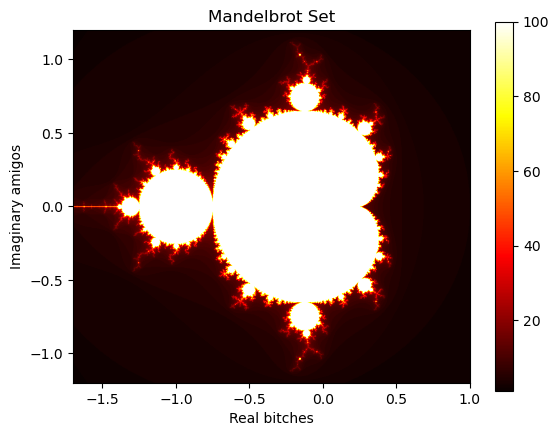

In [27]:
def mandelbrot_generator(dims, x_lims, y_lims, max_iter):
    # create image space
    mandelbrot_image = np.zeros((dims, dims))

    # generate the Mandelbrat
    for x in range(dims):
        for y in range(dims):
            real = x_lims[0] + (x / dims) * (x_lims[1] - x_lims[0])
            imag = y_lims[0] + (y / dims) * (y_lims[1] - y_lims[0])
            c = complex(real, imag)
            z = 0 + 0j 
            iteration = 0
            while abs(z) <= 2 and iteration < max_iter:
                z = z*z + c # Mandelbrot generator
                iteration += 1

            mandelbrot_image[y, x] = iteration

    # plotting your mom aka the Mandelbrat set
    plt.imshow(mandelbrot_image, extent=[x_lims[0], x_lims[1], y_lims[0], y_lims[1]], cmap='hot')
    plt.colorbar()
    plt.title('Mandelbrot Set')
    plt.xlabel('Real bitches')
    plt.ylabel('Imaginary amigos')
    plt.show()

mandelbrot_generator(dims=800, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=100)


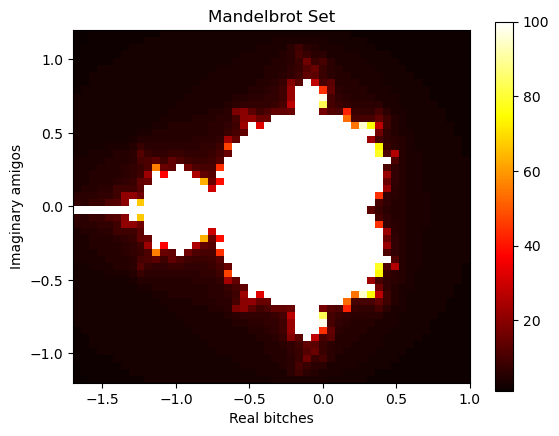

In [28]:
def mandelbrot_generator(dims, x_lims, y_lims, max_iter):
    # create image space
    mandelbrot_image = np.zeros((dims, dims))

    # generate the Mandelbrat
    for x in range(dims):
        for y in range(dims):
            real = x_lims[0] + (x / dims) * (x_lims[1] - x_lims[0])
            imag = y_lims[0] + (y / dims) * (y_lims[1] - y_lims[0])
            c = complex(real, imag)
            z = 0 + 0j 
            iteration = 0
            while abs(z) <= 2 and iteration < max_iter:
                z = z*z + c # Mandelbrot generator
                iteration += 1

            mandelbrot_image[y, x] = iteration

    # plotting your mom aka the Mandelbrat set
    plt.imshow(mandelbrot_image, extent=[x_lims[0], x_lims[1], y_lims[0], y_lims[1]], cmap='hot')
    plt.colorbar()
    plt.title('Mandelbrot Set')
    plt.xlabel('Real bitches')
    plt.ylabel('Imaginary amigos')
    plt.show()

mandelbrot_generator(dims=50, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=100)
